In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
raw_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
raw_data.shape

(1460, 81)

In [16]:
with open('house-prices-advanced-regression-techniques/data_description.txt',  'r') as fi:
    print(fi.read())


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [8]:
# Tamer already cleaned the data, so import the cleaned and semi_cleaned data.
clean_data = pd.read_csv('clean_data.csv')
clean_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,3,2,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,2,2,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,3,2,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,2,2,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,3,2,...,0,0,0,0,1,0,0,0,1,0


In [9]:
semi_clean_data = pd.read_csv('semi_clean_data.csv')
semi_clean_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,0,0,0,NoMisc,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,0,0,0,NoMisc,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,0,0,0,NoMisc,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,0,0,0,NoMisc,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,0,0,0,NoMisc,0,12,2008,WD,Normal,250000


In [11]:
semi_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non

In [177]:
clean_data.info() 
# In raw data, there's many categorical data. Since they are nominal data, he performed one-hot encoding 
#on these columns, and the number of columns grow sharply here.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 534 entries, Id to SaleCondition_Partial
dtypes: float64(2), int64(532)
memory usage: 5.9 MB


In [187]:
clean_data=clean_data.drop(['SalePrice'],axis=1) #drop the y in clean_data

In [188]:
clean_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.054832,56.881426,57.612748,10517.363948,6.100069,5.575737,1971.244003,1984.850583,2.396162,2.083619,...,0.003427,0.003427,0.083619,0.002056,0.867718,0.002742,0.008225,0.013708,0.820425,0.085675
std,421.411181,42.310746,34.673850,9984.666267,1.383171,1.113079,30.199555,20.644343,0.574384,0.351167,...,0.058460,0.058460,0.276910,0.045314,0.338914,0.052306,0.090348,0.116316,0.383965,0.279980
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.500000,20.000000,42.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.000000,50.000000,63.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1094.500000,70.000000,79.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [189]:
# split our X and y
X = clean_data.iloc[:,1:] # drop the id column
y = semi_clean_data.iloc[:,-1]

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [191]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [192]:
# feature selection
from sklearn.ensemble import ExtraTreesRegressor
forest = ExtraTreesRegressor(n_estimators=200,random_state=42)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [193]:
columns = clean_data.columns[1:]
columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond', 'BsmtQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=532)

In [194]:
# show top 10 important features
n = 10
print("Top Features ranking:")
i = 0
top_features = []
top_importance = []
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, columns[indices[f]-1], importances[indices[f]]))
    top_features.append(columns[indices[f]-1])
    top_importance.append(importances[indices[f]])
    i = i+1
    if i> n-1:
        break

Top Features ranking:
1. feature LotArea (0.251993)
2. feature GarageFinish (0.111620)
3. feature YearRemodAdd (0.094823)
4. feature KitchenAbvGr (0.082707)
5. feature LowQualFinSF (0.072701)
6. feature ExterCond (0.040165)
7. feature BsmtHalfBath (0.033220)
8. feature Fireplaces (0.018640)
9. feature CentralAir (0.016270)
10. feature BsmtUnfSF (0.014682)


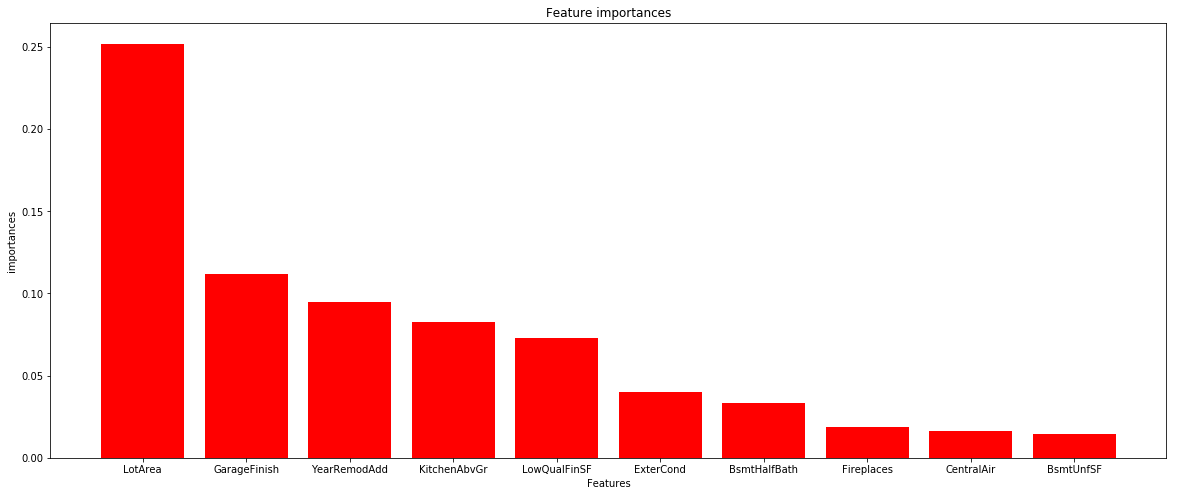

In [195]:
# Plot the feature importances of the forest
plt.figure(figsize=(20,8))
plt.title("Feature importances")
plt.bar(top_features,top_importance,
       color="r",  align="center")
plt.xlabel('Features')
plt.ylabel('importances')
plt.show()

In [196]:
# The most important feature is LotArea, Lot size in square feet.

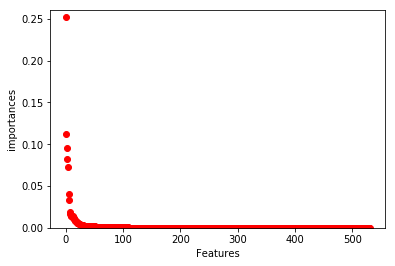

In [198]:
# show all features importance.
plt.scatter(range(X.shape[1]), importances[indices],
       color="r") 
plt.xlabel('Features')
plt.ylabel('importances')
plt.ylim([0,0.26])
plt.show()

In [204]:
# As we can see, importance of features rank after around 140 already drop to be very close to 0.
importances[indices[:15]].sum() # the top 15 features account for 80% importances.
# so I suggest drop the columns after 15 rank.

0.803227582649367

In [210]:
X_selected = X.iloc[:,indices[:15]-1]
X_selected.head()

,LotArea,GarageFinish,YearRemodAdd,KitchenAbvGr,LowQualFinSF,ExterCond,BsmtHalfBath,Fireplaces,CentralAir,BsmtUnfSF,GarageCars,Neighborhood_NWAmes,1stFlrSF,BsmtFinType1,GarageYrBlt
0,8450,2,2003,1,0,2,0,0,1,150,2,0,856,6,2003.0
1,9600,2,1976,1,0,2,1,1,1,284,2,0,1262,5,1976.0
2,11250,2,2002,1,0,2,0,1,1,434,2,0,920,6,2001.0
3,9550,1,1970,1,0,2,0,1,1,540,3,0,961,5,1998.0
4,14260,2,2000,1,0,2,0,1,1,490,3,0,1145,6,2000.0


In [211]:
# Although trees are not sensitive to scaling, I still tried it with scaled data, the result is almost the same.
forest = ExtraTreesRegressor(n_estimators=200,random_state=42)
forest.fit(X_train_sc, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [212]:
n = 10
print("Top Features ranking:")
i = 0
top_features = []
top_importance = []
for f in range(X_train_sc.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, columns[indices[f]-1], importances[indices[f]]))
    top_features.append(columns[indices[f]-1])
    top_importance.append(importances[indices[f]])
    i = i+1
    if i> n-1:
        break

Top Features ranking:
1. feature LotArea (0.210280)
2. feature GarageFinish (0.110501)
3. feature YearRemodAdd (0.106108)
4. feature KitchenAbvGr (0.104396)
5. feature LowQualFinSF (0.065334)
6. feature ExterCond (0.055447)
7. feature BsmtFinType1 (0.016105)
8. feature OverallCond (0.015602)
9. feature BsmtUnfSF (0.015432)
10. feature BsmtHalfBath (0.014532)


In [213]:
X_selected.to_csv('TreeSelected.csv')